In [1]:
# import Packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import nltk                   # nltk-natural language toolkit
import re                       # re-regular expression using to clean the text data
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords             # Corpus means huge amount of data like paragraph data.document means sentences.
                                              # Stopwords means unnecessary like in,the,is,are,am,was,i ------

In [2]:
#load dataset

data=pd.read_csv(r"C:\Users\Chandra Shekhar\Downloads\SPAM EMAIL.csv",encoding='latin-1')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# download stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

# function to clean Message            # re-regular expression using to clean the text data

def clean_Message(Message):                      
    Message=re.sub(r'\W',' ', Message)             #remove all special characters
    Message=re.sub(r'\s+',' ',Message)             # remove multiple spaces 
    Message=Message.lower()                   #convert to lowercase
    Message=Message.strip()                   #remove starting and ending spaces
    Message=' '.join([word for word in Message.split() if word not in stop_words])
    return Message

# apply cleaning to the Message column
data['Message']=data['Message'].apply(clean_Message)

[nltk_data] Downloading package stopwords to C:\Users\Chandra
[nltk_data]     Shekhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data['Category']=data['Category'].map({'spam':1,'ham':0})    #If your model predicts 1 ➔ it means Spam
                                                            #If your model predicts 0 ➔ it means Not Spam (Ham)

In [6]:
X=data['Message']
y=data['Category']

# train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [7]:
# Initialize COUNT Vectorizer

vectorizer=TfidfVectorizer(max_features=3000)

X_train_vect=vectorizer.fit_transform(X_train).toarray()
X_test_vect=vectorizer.transform(X_test).toarray()

In [8]:
# initialize Naine Bayes

model=MultinomialNB()
model.fit(X_train_vect,y_train)


MultinomialNB()

In [9]:
# Predictions on the test set

y_pred=model.predict(X_test_vect)

In [10]:
# Evaluation metrices

accuracy=accuracy_score(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)

# print results

print(f"Accuracy : {accuracy*100:.2f}%")
print("Classification_report :",class_report)
print("Confusion_matrix :",matrix)

Accuracy : 98.27%
Classification_report :               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.88      0.93       224

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion_matrix : [[1447    1]
 [  28  196]]


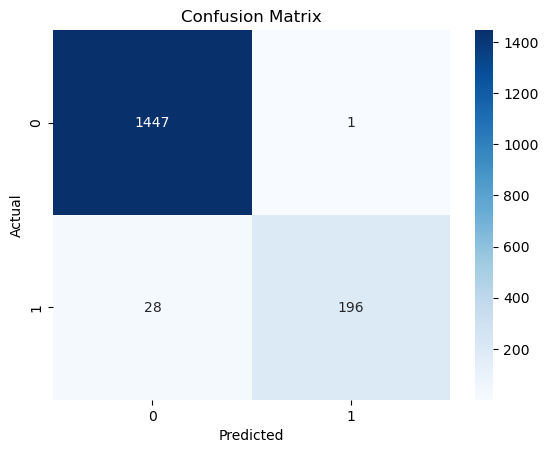

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix,annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [14]:
# Now, to predict new email content
def predict_spam_or_not(email_content):
    # Clean the email input using the same function
    cleaned_email = clean_Message(email_content)
    
    # Vectorize the cleaned email text
    email_vect = vectorizer.transform([cleaned_email]).toarray()
    
    # Predict using the trained model
    prediction = model.predict(email_vect)
    
    # Print the result
    if prediction[0] == 1:
        print("Result:  This email is SPAM!")
    else:
        print("Result: This email is NOT SPAM.")

# Example usage for input from the user
user_email = input("Enter the email content: ")
predict_spam_or_not(user_email)

Enter the email content:  Please review the project document before tomorrow's meeting. Output:


Result: This email is NOT SPAM.
